In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.spatial.distance import euclidean

# For results repeatability
np.random.seed(0)

# Dataset preprocessing

## Dataset 1

In [2]:
dataset = pd.read_csv("data/adult.data", header=None)

In [3]:
dataset.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]

In [4]:
dataset = dataset[(dataset!=" ?").all(axis=1)].reset_index(drop=True)
df_strings = dataset.select_dtypes(['object'])
dataset[df_strings.columns] = df_strings.apply(lambda x: x.str.strip())

In [5]:
clean_dataset = pd.DataFrame(dataset["age"])
for col in dataset.columns[1:-1]:
    if(dataset[col].dtype =='O'):
        clean_dataset = clean_dataset.join(pd.get_dummies(dataset[col], prefix=col))
    else:
        clean_dataset = clean_dataset.join(dataset[col])
labels = (dataset["salary"]==">50K")*1
dataset = clean_dataset

## Dataset 2

# Utils

In [6]:
def plotMeanAndStd(stats, x, color='b'):
    """
    Input : array of tuples (mean std) and their x coordinates
    """
    mean = np.array([s[0] for s in stats])
    standard_dev = np.array([s[1] for s in stats])
    plt.plot(x, mean, c='b')
    plt.fill_between(x, mean-standard_dev, mean+standard_dev, alpha=0.2, color='b')

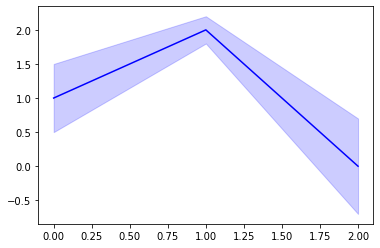

In [7]:
plotMeanAndStd([(1,0.5),(2,0.2),(0,0.7)], [0,1,2])
plt.show()

# Error measure

In [8]:
def error(predicted_labels, real_labels, loss="euclidean"):
    """
    Input: numpy array containing respectively the labels an algorithm predicted, and the real labels corresponding
    to the data. Type of loss we want to use.
    
    Output: float, the computed loss.
    """
    if loss == "euclidean": return euclidean(predicted_labels, real_labels)
    elif loss == "manhattan": return sum(abs(predicted_labels - real_labels))
    
    

# Knn

We use scikit-learn's knn function to design a knn classifier.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
def knn(training_features, training_labels, to_predict_features,
        n_neighbors=5, weights = "uniform", algorithm="auto", p=2):
    
    """
    Input: Training data, features for which we want to predict the labels, number of neighbors k for knn algo,
    features weights system (uniform or distance), algorithm usewd to find closer k neighbors, p is the value
    used in the computation of the minkowski distance that is used here, p=1 gives a manhattan distance, p=2 a
    euclidian distance.
    
    Output: Numpy array containing the labels predicted by KNN for the given 'to_predict_features'
    """
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p)
    neigh.fit(training_features, training_labels)
    
    return neigh.predict(to_predict_features)

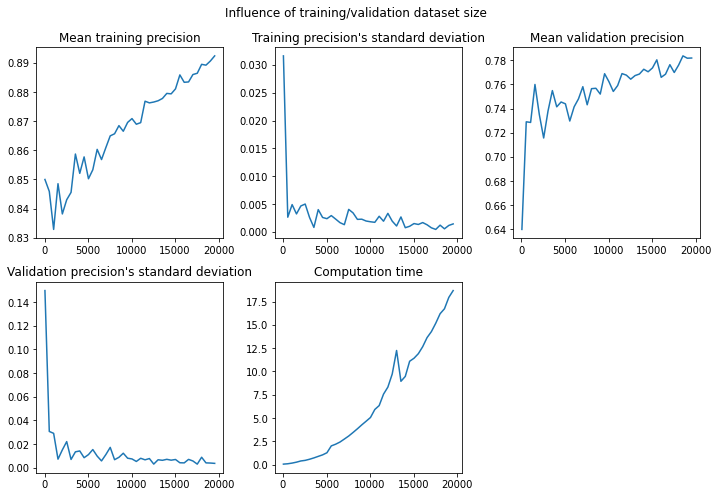

([0.85,
  0.8459090909090909,
  0.832857142857143,
  0.848548387096774,
  0.838170731707317,
  0.8430392156862745,
  0.8455737704918033,
  0.8587323943661971,
  0.8520987654320988,
  0.8577472527472528,
  0.8502475247524751,
  0.8533333333333333,
  0.8603305785123968,
  0.8568320610687022,
  0.8609574468085107,
  0.8649668874172185,
  0.8656832298136645,
  0.8684795321637427,
  0.8665469613259669,
  0.8695811518324608,
  0.8708955223880597,
  0.8689573459715639,
  0.869502262443439,
  0.8768614718614718,
  0.876286307053942,
  0.8765737051792829,
  0.8770114942528735,
  0.8778044280442805,
  0.8795373665480428,
  0.8793814432989692,
  0.8810963455149503,
  0.8858842443729904,
  0.883348909657321,
  0.8834743202416918,
  0.8860117302052786,
  0.8864529914529914,
  0.8895152354570637,
  0.8892318059299191,
  0.8906430446194225,
  0.8924168797953964],
 [0.031622776601683784,
  0.002650432679475144,
  0.004914230342988148,
  0.0032418953616518936,
  0.0046693145656284555,
  0.0050124796200

In [16]:
data_size_influence(knn, dataset, labels, 50, 20000, 500, loss_="manhattan", folds = 5, algo_kwargs={"n_neighbors":3}, show_time=True, visualize=True)
    

Let us study the influence of the hyperparameter k (number of neighbors) on KNN algorithm's performance.

In [ ]:
def n_neighbors_influence_multiple_datasize(Ks, dataset_, labels_, N_start, N_end, N_step, loss_="manhattan",
                                            folds = 5, show_time=False, visualize=True):
    
    mean_training_per_k = dict()
    std_training_per_k = dict()
    mean_validation_per_k = dict()
    std_validation_per_k = dict()
    
    if show_time: time_per_k = dict()
    
    for k in Ks:
        print(k)
        if show_time: (mean_trainings, std_trainings, mean_validations, std_validations, times) = data_size_influence(knn, dataset_, labels_, N_start, N_end, N_step, loss_="manhattan", folds = folds, algo_kwargs={"n_neighbors":k}, show_time=show_time, visualize=False)
        else: (mean_trainings, std_trainings, mean_validations, std_validations) = data_size_influence(knn, dataset_, labels_, N_start, N_end, N_step, loss_="manhattan", folds = folds, algo_kwargs={"n_neighbors":k}, show_time=show_time, visualize=False)
            
        mean_training_per_k[k] = mean_trainings
        std_training_per_k[k] = std_trainings
        mean_validation_per_k[k]  = mean_validations
        std_validation_per_k[k]  = std_validations

        if show_time: time_per_k[k]  = times
    
    if visualize:
        
        Ns = list(range(N_start, N_end, N_step))
        
        fig = plt.figure(figsize=(10,7))
        fig.suptitle("Influence of K (in k nearest neighbor) and training/validation dataset size")
        
        ax1 = fig.add_subplot(231)
        ax1.title.set_text("Mean training precision")
        for k in Ks:
            ax1.plot(Ns, mean_training_per_k[k], label=f"k={k}")
        plt.legend()

        ax2 = fig.add_subplot(232)
        ax2.title.set_text("Training precision's standard deviation")
        for k in Ks:
            ax2.plot(Ns, std_training_per_k[k], label=f"k={k}")
        plt.legend()

        ax3 = fig.add_subplot(233)
        ax3.title.set_text("Mean validation precision")
        for k in Ks:
            ax3.plot(Ns, mean_validation_per_k[k], label=f"k={k}")
        plt.legend()

        ax4 = fig.add_subplot(234)
        ax4.title.set_text("Validation precision's standard deviation")
        for k in Ks:
            ax4.plot(Ns, std_validation_per_k[k], label=f"k={k}")
        plt.legend()

        if show_time:
            ax5 = fig.add_subplot(235)
            ax5.title.set_text("Computation time")
            for k in Ks:
                ax5.plot(Ns, time_per_k[k], label=f"k={k}")
            plt.legend()
        
        
        plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=3, 
                        top=3, 
                        wspace=1, 
                        hspace=1)

        fig.tight_layout()
        
        plt.show()
        
        
    
    
    if show_time: return (mean_training_per_k, std_training_per_k, mean_validation_per_k, std_validation_per_k, time_per_k)
    else: return (mean_training_per_k, std_training_per_k, mean_validation_per_k, std_validation_per_k)
    

In [ ]:
n_neighbors_influence(list(range(1, 6)), dataset, labels, 50, 10000, 500, loss_="manhattan",
                          folds = 5, show_time=False, visualize=True)

In [ ]:
def n_neighbors_influence_fixed_datasize(Ks, dataset_, labels_, N, loss_="manhattan",
                                         folds = 5, show_time=False, visualize=True):
    nrows = dataset_.shape[0]
    mean_trainings = []
    std_trainings = []
    mean_validations = []
    std_validations = []
    
    if show_time: times = []
    
    for k in Ks:
        indices = list(np.random.choice(nrows, N))
        d = dataset.iloc[indices]
        l = labels.iloc[indices]
        
        if show_time: t = time.time()
        mean_training, std_training, mean_validation, std_validation = cross_validation(knn, d, l, folds = folds, algo_kwargs={"n_neighbors": k})
        if show_time: times.append(time.time() - t)
        
        mean_trainings.append(mean_training)
        std_trainings.append(std_training)
        mean_validations.append(mean_validation)
        std_validations.append(std_validation)
    
    if visualize:
        fig = plt.figure(figsize=(10,7))
        fig.suptitle("Influence of training/validation dataset size")
        ax1 = fig.add_subplot(231)
        ax1.title.set_text("Mean training precision")
        ax1.plot(Ks, mean_trainings)

        ax2 = fig.add_subplot(232)
        ax2.title.set_text("Training precision's standard deviation")
        ax2.plot(Ks, std_trainings)

        ax3 = fig.add_subplot(233)
        ax3.title.set_text("Mean validation precision")
        ax3.plot(Ks, mean_validations)

        ax4 = fig.add_subplot(234)
        ax4.title.set_text("Validation precision's standard deviation")
        ax4.plot(Ks, std_validations)

        if show_time:
            ax5 = fig.add_subplot(235)
            ax5.title.set_text("Computation time")
            ax5.plot(Ks, times)
        
        plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=3, 
                        top=3, 
                        wspace=1, 
                        hspace=1)

        fig.tight_layout()
        plt.show()
    
    if show_time: return (mean_trainings, std_trainings, mean_validations, std_validations, times)
    else: 
        return (mean_trainings, std_trainings, mean_validations, std_validations)
    

In [ ]:
 n_neighbors_influence_fixed_datasize(list(range(1, 100)), dataset, labels, 2000, loss_="manhattan",
                                         folds = 5, show_time=False, visualize=True)

### Knn results for dataset 1

##### Selecting best hyperparameter

##### Results on test dataset

### Knn results for dataset 2

##### Selecting best hyperparameter

##### Results on test dataset

# Decision tree

We use scikit-learn's decision tree function to design a decision tree classifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
def decision_tree(training_features, training_labels, to_predict_features,
                  criterion='gini', splitter='best'):
    """
    :param training_features: training features (x)
    :param training_labels: training labels (y)
    :param to_predict_features: features that we want to predict
    :param criterion: {"best", "random"} Default is "gini" for the Gini impurity and "entropy" for the information gain
    :param splitter: {"best", "random"} Default is "best" to choose the best split and "random" to choose the best random split.
    :return:Numpy array containing the labels predicted by Decision Tree for the given 'to_predict_features'
    """
    classifier = DecisionTreeClassifier(criterion=criterion, splitter=splitter)
    classifier.fit(training_features, training_labels)
    
    return classifier.predict(to_predict_features)

In [ ]:
training_features = dataset[0:1000]
training_labels = labels[0:1000]
to_predict_features = dataset[1000:1200]
predicted_labels = decision_tree(training_features, training_labels, to_predict_features)
real_labels = labels[1000:1200]
print(error(predicted_labels, real_labels, loss="manhattan"))

In [ ]:
training_features = dataset[0:1000]
training_labels = labels[0:1000]
to_predict_features = dataset[1000:1200]
predicted_labels = decision_tree(training_features, training_labels, to_predict_features)
real_labels = labels[1000:1200]
print(error(predicted_labels, real_labels, loss="manhattan"))

# Cross validation

In [14]:
def cross_validation(algo, dataset_, labels_, loss_="manhattan", folds = 5, algo_kwargs={}):
    """
    Input : Predictor function that works by supplying training set and labels and test set and return predicted labels
            dataset  and corresponding labels
            folds
            algo_kwargs : a dict with additional params for the algo : ex. {'n_neighbors':5}
    Output : Precision mean and variance
    """
    dataset_size = dataset_.shape[0]
    group_ids = np.tile(np.arange(folds),int(dataset_size/folds)+1)[:dataset_size]
    np.random.shuffle(group_ids)
    training_precisions = []
    validation_precisions = []
    for N in range(folds):
        training_set = dataset_[group_ids != N]
        training_labels = labels_[group_ids != N]
        test_set = dataset_[group_ids == N]
        test_labels = labels_[group_ids == N]
        # Training error
        training_predicted_labels = algo(training_set, training_labels, training_set, **algo_kwargs)
        training_precisions += [(len(training_labels) - error(training_predicted_labels, training_labels, loss = loss_))/len(training_labels)]
    
        
        # Validation error
        validation_predicted_labels = algo(training_set, training_labels, test_set, **algo_kwargs)
        validation_precisions += [(len(test_labels) - error(validation_predicted_labels, test_labels, loss = loss_))/len(test_labels)]
    
    
    return (np.mean(training_precisions), np.std(training_precisions), np.mean(validation_precisions), np.std(validation_precisions))

In [ ]:
cross_validation(knn, dataset[:1000], labels[:1000], folds = 10, algo_kwargs={'n_neighbors':3})

# Influence of dataset's size

Now we study the influence of the size of the training / validation dataset on the training / validation errors.

In [12]:
def data_size_influence(algo, dataset_, labels_, N_start, N_end, N_step, loss_="manhattan", folds = 5, algo_kwargs={}, show_time=False, visualize=True):
    
    nrows = dataset_.shape[0]
    Ns = []
    mean_trainings = []
    std_trainings = []
    mean_validations = []
    std_validations = []
    
    if show_time: times = []
    
    for N in range(N_start, N_end, N_step):
        Ns.append(N)
        indices = list(np.random.choice(nrows, N))
        d = dataset.iloc[indices]
        l = labels.iloc[indices]
        
        if show_time: t = time.time()
        mean_training, std_training, mean_validation, std_validation = cross_validation(knn, d, l, folds = folds, algo_kwargs=algo_kwargs)
        if show_time: times.append(time.time() - t)
        
        mean_trainings.append(mean_training)
        std_trainings.append(std_training)
        mean_validations.append(mean_validation)
        std_validations.append(std_validation)
    
    if visualize:
        fig = plt.figure(figsize=(10,7))
        fig.suptitle("Influence of training/validation dataset size")
        ax1 = fig.add_subplot(231)
        ax1.title.set_text("Mean training precision")
        ax1.plot(Ns, mean_trainings)

        ax2 = fig.add_subplot(232)
        ax2.title.set_text("Training precision's standard deviation")
        ax2.plot(Ns, std_trainings)

        ax3 = fig.add_subplot(233)
        ax3.title.set_text("Mean validation precision")
        ax3.plot(Ns, mean_validations)

        ax4 = fig.add_subplot(234)
        ax4.title.set_text("Validation precision's standard deviation")
        ax4.plot(Ns, std_validations)

        if show_time:
            ax5 = fig.add_subplot(235)
            ax5.title.set_text("Computation time")
            ax5.plot(Ns, times)
        plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=3, 
                        top=3, 
                        wspace=1, 
                        hspace=1)

        fig.tight_layout()
        plt.show()
    
    if show_time: return (mean_trainings, std_trainings, mean_validations, std_validations, times)
    else: return (mean_trainings, std_trainings, mean_validations, std_validations)

In [ ]:
data_size_influence(knn, dataset, labels, 50, 10000, 500, loss_="manhattan", folds = 5, algo_kwargs={"n_neighbors":3}, show_time=True, visualize=True)